# Physics 91SI: Final Project

**AIM**: Identify ships on San Francisco docks using Planet Lab data by implementing different machine learning algorithms

- STEP 1: Open and load data
- STEP 2: Data stripping & Feature extraction
- STEP 3: Training & Testing

We will also be testing if adding edge detection features improves the performance of the chosen algorithms.

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import time
from skimage import filters

## STEP 1: Open and load data

In [2]:
f  = open("ships-in-satellite-imagery/shipsnet.json", "r")
data = json.loads(f.read())

In [3]:
for id in data:
    print(id)

data
labels
locations
scene_ids


In [4]:
X_rough = np.array(data["data"])
X = []
Y = np.array(data["labels"])

for x in X_rough:
    X.append(x.reshape([3, 80, 80]))
X = np.array(X, dtype = "float32")

In [5]:
X.shape

(3600, 3, 80, 80)

Thus we have 3600 images of 80 x 80 pixels each with the 3 RGB color values stored in the 4-dimensional X array. In the 1 dimensional Y array we have values 0 or 1 depending on if a ship is present in the picture. 

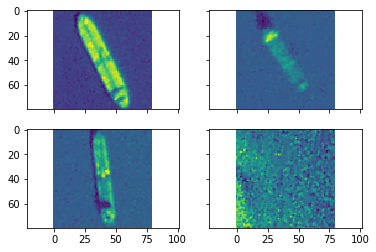

In [6]:
f, ax = plt.subplots(2, 2, sharex = True, sharey = True)
ax[0,0].imshow(X[0][1])
ax[1,0].imshow(X[10][1])
ax[0,1].imshow(X[100][1])
ax[1,1].imshow(X[1000][1])
plt.show()

## STEP 2: Data stripping & Feature Extraction

We will have an array X_use that will have 8 features associated with each image as shown below:

In [7]:
X_use = []
for x in X: 
    mean_r = np.mean(x[0].reshape(6400))
    mean_g = np.mean(x[1].reshape(6400))
    mean_b = np.mean(x[2].reshape(6400))
    var_r = np.var(x[0].reshape(6400))
    var_g = np.var(x[1].reshape(6400))
    var_b = np.var(x[2].reshape(6400))
    mean = np.mean(x.reshape(19200))
    var = np.var(x.reshape(19200))
    X_use.append([mean_r, mean_g, mean_b, var_r, var_g, var_b, mean, var])

In [8]:
X_use = np.array(X_use)

In [9]:
X_use.shape

(3600, 8)

In [10]:
Y.shape

(3600,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_use, Y, test_size=0.25, random_state=42)

We split the data into train(75%) and test(25%) sets.

## Step 3: Training & Testing

### K-nearest Neighbors 

In [12]:
start = time.time()

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
print("No.of neighbours: 10")
print("Training score  :",knn.score(X_train, y_train))
print("Testing score   :",knn.score(X_test, y_test))

end = time.time()
print("Time taken:",end - start,"s")

No.of neighbours: 10
Training score  : 0.8025925925925926
Testing score   : 0.7533333333333333
Time taken: 0.05199885368347168 s


In [13]:
start = time.time()

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print("No.of neighbours: 1")
print("Training score  :",knn.score(X_train, y_train))
print("Testing score   :",knn.score(X_test, y_test))

end = time.time()
print("Time taken:",end - start,"s")

No.of neighbours: 1
Training score  : 1.0
Testing score   : 0.7177777777777777
Time taken: 0.024005889892578125 s


In [14]:
start = time.time()

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
print("No.of neighbours: 5")
print("Training score  :",knn.score(X_train, y_train))
print("Testing score   :",knn.score(X_test, y_test))

end = time.time()
print("Time taken:",end - start,"s")

No.of neighbours: 5
Training score  : 0.83
Testing score   : 0.7411111111111112
Time taken: 0.04400277137756348 s


In [15]:
start = time.time()

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)
print("No.of neighbours: 30")
print("Training score  :",knn.score(X_train, y_train))
print("Testing score   :",knn.score(X_test, y_test))

end = time.time()
print("Time taken:",end - start,"s")

No.of neighbours: 30
Training score  : 0.7811111111111111
Testing score   : 0.7566666666666667
Time taken: 0.08001542091369629 s


As we increase the number of neighbors, K-nearest neighbors performs better. However, time taken also increases.

### Random Forest Classifier 

In [16]:
start = time.time()

rfc = RandomForestClassifier(n_estimators = 10)
rfc.fit(X_train, y_train)
print("Number of Trees : 10")
print("Training score  :",rfc.score(X_train, y_train))
print("Testing score   :",rfc.score(X_test, y_test))

end = time.time()
print("Time taken:",end - start,"s")

Number of Trees : 10
Training score  : 0.9862962962962963
Testing score   : 0.7266666666666667
Time taken: 0.10801029205322266 s


In [17]:
start = time.time()

rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)
print("Number of Trees : 100")
print("Training score  :",rfc.score(X_train, y_train))
print("Testing score   :",rfc.score(X_test, y_test))

end = time.time()
print("Time taken:",end - start,"s")

Number of Trees : 100
Training score  : 1.0
Testing score   : 0.7322222222222222
Time taken: 0.7016286849975586 s


Substantially increasing the number of classifiers did not improve the Random Forest performance but the time taken greatly increased.

###  Gaussian Naive Bayes

In [18]:
start = time.time()

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Training score  :",gnb.score(X_train, y_train))
print("Testing score   :",gnb.score(X_test, y_test))

end = time.time()
print("Time taken:",end - start,"s")

Training score  : 0.7133333333333334
Testing score   : 0.6933333333333334
Time taken: 0.003996610641479492 s


Gaussian Naive Bayes performed much worse than both k-nearest neighbors and randon forest algorithms.

## Edge Detection 

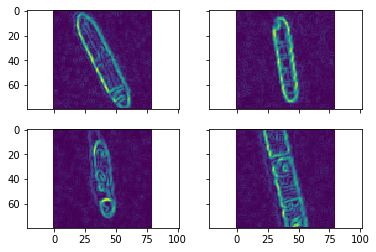

In [19]:
edges = []
for i in range(0,4):
    edges.append(filters.sobel(np.array(X[i][0], dtype = "int")))

f, ax = plt.subplots(2, 2, sharex = True, sharey = True)
ax[0,0].imshow(edges[0])
ax[1,0].imshow(edges[1])
ax[0,1].imshow(edges[2])
ax[1,1].imshow(edges[3])
plt.show()

Now we make a new feature array X_wedges that contains edge related features as shown below in addition to all the previous features:

In [20]:
X_wedges = []
for i in range(len(X)):
    mean_r = np.mean(filters.sobel(np.array(X[i][0], dtype = "int")).reshape(6400))
    var_r = np.var(filters.sobel(np.array(X[i][0], dtype = "int")).reshape(6400))
    mean_g = np.mean(filters.sobel(np.array(X[i][1], dtype = "int")).reshape(6400))
    var_g = np.var(filters.sobel(np.array(X[i][1], dtype = "int")).reshape(6400))
    mean_b = np.mean(filters.sobel(np.array(X[i][2], dtype = "int")).reshape(6400))
    var_b = np.var(filters.sobel(np.array(X[i][2], dtype = "int")).reshape(6400))
    X_wedges.append(np.append(X_use[i], [mean_r, mean_g, mean_b, var_r, var_g, var_b]))
X_wedges = np.array(X_wedges)
print(X_wedges.shape)

(3600, 14)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_wedges, Y, test_size=0.20, random_state=42)

In [22]:
start = time.time()

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
print("No.of neighbours: 10")
print("Training score  :",knn.score(X_train, y_train))
print("Testing score   :",knn.score(X_test, y_test))

end = time.time()
print("Time taken:",end - start,"s")

No.of neighbours: 10
Training score  : 0.8038194444444444
Testing score   : 0.7555555555555555
Time taken: 0.06002473831176758 s


In [23]:
start = time.time()

rfc = RandomForestClassifier(n_estimators = 10)
rfc.fit(X_train, y_train)
print("Number of Trees : 10")
print("Training score  :",rfc.score(X_train, y_train))
print("Testing score   :",rfc.score(X_test, y_test))

end = time.time()
print("Time taken:",end - start,"s")

Number of Trees : 10
Training score  : 0.9760416666666667
Testing score   : 0.7180555555555556
Time taken: 0.08050203323364258 s


In [24]:
start = time.time()

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Training score  :",gnb.score(X_train, y_train))
print("Testing score   :",gnb.score(X_test, y_test))

end = time.time()
print("Time taken:",end - start,"s")

Training score  : 0.7131944444444445
Testing score   : 0.6861111111111111
Time taken: 0.007984638214111328 s


**Conclusion**: Adding edge detection features did not make much difference to the performance of any of the algorithms.

## Bibliography

1. https://www.kaggle.com/rhammell/ships-in-satellite-imagery/data
2. https://realpython.com/python-json/
3. http://scikit-learn.org/stable/supervised_learning.html#supervised-learning
4. http://scikit-image.org/